In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#sklearn metrics
# from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

#model selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# **Introduction**
Nuclear fusion is a promising clean energy source that aligns with UN Sustainable Development Goal 7: **Affordable and Clean Energy**. It has the potential to revolutionize global energy production by providing a virtually limitless and pollution free power source. This study analyzes a Nuclear Fusion Data set sourced from Kaggle to explore the factors influencing nuclear fusion ignition.

In [44]:
df = pd.read_csv("/content/drive/My Drive/Herald College/Semester03/Concepts-AI/finalAssesment/Classification/fusion_experiment.csv")
df.head()

,Unnamed: 0,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Magnetic Field Configuration,Injection Energy,Beam Symmetry,Target Density,Target Composition,Fuel Density,Temperature,Confinement Time,Fuel Purity,Energy Input,Power Output,Pressure,Neutron Yield,Ignition
0,0,0.037454,0.058078,0.028259,0.015705,9.000578,tokamak,5.713125,0.800007,2.026963e+19,deuterium,7.612226e+19,4.050388e+08,0.842126,99.971295,250.726719,55.321517,6.107792e+06,5.443404e+10,0
1,1,0.095071,0.052697,0.045868,0.009551,3.841421,reversed field pinch,9.819548,0.082642,3.050685e+19,deuterium-tritium,8.742441e+19,2.551963e+08,0.504637,99.951049,345.614166,22.767959,4.921946e+06,8.372016e+10,0
2,2,0.073199,0.035104,0.009922,0.013794,1.467187,stellarator,7.016781,0.176319,5.287388e+19,tritium,8.236610e+19,2.627651e+08,0.357445,99.958831,290.050980,49.872944,9.798230e+06,8.112584e+10,1
3,3,0.059866,0.049321,0.044684,0.047349,9.277696,tokamak,4.018930,0.833709,5.961305e+19,deuterium-tritium,9.079654e+19,3.104709e+08,0.992195,99.997186,436.491093,2.656182,5.611293e+06,4.423307e+10,1
4,4,0.015602,0.036510,0.020308,0.088453,4.926347,reversed field pinch,6.145836,0.808161,7.887942e+19,deuterium,8.186142e+19,3.258529e+08,0.648677,99.927054,198.773196,48.096005,8.541064e+06,2.245276e+10,0


** Description**
 The dataset contains information on various parameters affecting nuclear fusion experiments, including plasma conditions, energy input, fuel properties, and power output. The dataset was created by Adebusayo Adewunmi and accessed through Kaggle.The dataset consists of 20 attributes, including numerical and categorical features

In [45]:
df.describe()


,Unnamed: 0,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Injection Energy,Beam Symmetry,Target Density,Fuel Density,Temperature,Confinement Time,Fuel Purity,Energy Input,Power Output,Pressure,Neutron Yield,Ignition
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000
mean,49999.500000,4.994883e-02,5.013301e-02,5.006243e-02,4.989715e-02,5.509036,5.489459,0.500708,5.517243e+19,5.495343e+19,2.998482e+08,0.549042,99.949966,299.847605,49.927760,5.496187e+06,5.497144e+10,0.301000
std,28867.657797,2.883414e-02,2.886917e-02,2.888094e-02,2.886235e-02,2.594419,2.598113,0.288292,2.602216e+19,2.597856e+19,1.153785e+08,0.259401,0.028833,115.405757,28.839169,2.598644e+06,2.593742e+10,0.458695
min,0.000000,5.536676e-07,4.778609e-07,2.298183e-07,2.227296e-07,1.000194,1.000047,0.000045,1.000007e+19,1.000023e+19,1.000002e+08,0.100011,99.900000,100.011093,0.000038,1.000012e+06,1.000212e+10,0.000000
25%,24999.750000,2.495460e-02,2.507175e-02,2.502999e-02,2.489844e-02,3.259118,3.242047,0.252094,3.255660e+19,3.243652e+19,2.000062e+08,0.323836,99.925053,200.273055,24.949832,3.260671e+06,3.261843e+10,0.000000
50%,49999.500000,5.006298e-02,5.018813e-02,5.011355e-02,4.979599e-02,5.528357,5.479431,0.500056,5.530567e+19,5.490885e+19,2.994371e+08,0.547832,99.949894,300.004962,49.996943,5.472069e+06,5.479343e+10,0.000000
75%,74999.250000,7.495137e-02,7.504113e-02,7.504423e-02,7.494059e-02,7.746824,7.738020,0.750211,7.775961e+19,7.745861e+19,3.997211e+08,0.773525,99.974875,399.907316,74.850152,7.757556e+06,7.744068e+10,1.000000
max,99999.000000,9.999920e-02,9.999894e-02,9.999793e-02,9.999946e-02,9.999985,9.999954,0.999990,9.999935e+19,9.999921e+19,4.999991e+08,0.999993,99.999999,499.983891,99.999523,9.999994e+06,9.999922e+10,1.000000


In [46]:
df.columns

Index(['Unnamed: 0', 'Magnetic Field Fluctuations', 'Leakage', 'Instabilities',
       'Plasma Instabilities', 'Magnetic Field Strength',
       'Magnetic Field Configuration', 'Injection Energy', 'Beam Symmetry',
       'Target Density', 'Target Composition', 'Fuel Density', 'Temperature',
       'Confinement Time', 'Fuel Purity', 'Energy Input', 'Power Output',
       'Pressure', 'Neutron Yield', 'Ignition'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    100000 non-null  int64  
 1   Magnetic Field Fluctuations   100000 non-null  float64
 2   Leakage                       100000 non-null  float64
 3   Instabilities                 100000 non-null  float64
 4   Plasma Instabilities          100000 non-null  float64
 5   Magnetic Field Strength       100000 non-null  float64
 6   Magnetic Field Configuration  100000 non-null  object 
 7   Injection Energy              100000 non-null  float64
 8   Beam Symmetry                 100000 non-null  float64
 9   Target Density                100000 non-null  float64
 10  Target Composition            100000 non-null  object 
 11  Fuel Density                  100000 non-null  float64
 12  Temperature                   100000 non-null

In [48]:
df.isnull().sum()

,0
Unnamed: 0,0
Magnetic Field Fluctuations,0
Leakage,0
Instabilities,0
Plasma Instabilities,0
Magnetic Field Strength,0
Magnetic Field Configuration,0
Injection Energy,0
Beam Symmetry,0
Target Density,0


**NO null values found**

In [49]:
df.columns = df.columns.str.strip()# It removes whitespace from the begening and end of the column name.

In [50]:
df["Magnetic Field Configuration"].unique()

array(['tokamak', 'reversed field pinch', 'stellarator'], dtype=object)

In [51]:
dummies  = pd.get_dummies(df["Magnetic Field Configuration"], dtype=int)
dummies

,reversed field pinch,stellarator,tokamak
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
99995,0,0,1
99996,1,0,0
99997,0,0,1
99998,0,0,1


In [52]:
# Concatenate with the original DataFrame
df = pd.concat([df, dummies], axis=1)

In [53]:
df["Target Composition"].unique()

array(['deuterium', 'deuterium-tritium', 'tritium'], dtype=object)

In [54]:
dummies  = pd.get_dummies(df["Target Composition"], dtype=int)

In [55]:
# Concatenate with the original DataFrame
df = pd.concat([df, dummies], axis=1)

In [56]:
df

,Unnamed: 0,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Magnetic Field Configuration,Injection Energy,Beam Symmetry,Target Density,...,Power Output,Pressure,Neutron Yield,Ignition,reversed field pinch,stellarator,tokamak,deuterium,deuterium-tritium,tritium
0,0,0.037454,0.058078,0.028259,0.015705,9.000578,tokamak,5.713125,0.800007,2.026963e+19,...,55.321517,6.107792e+06,5.443404e+10,0,0,0,1,1,0,0
1,1,0.095071,0.052697,0.045868,0.009551,3.841421,reversed field pinch,9.819548,0.082642,3.050685e+19,...,22.767959,4.921946e+06,8.372016e+10,0,1,0,0,0,1,0
2,2,0.073199,0.035104,0.009922,0.013794,1.467187,stellarator,7.016781,0.176319,5.287388e+19,...,49.872944,9.798230e+06,8.112584e+10,1,0,1,0,0,0,1
3,3,0.059866,0.049321,0.044684,0.047349,9.277696,tokamak,4.018930,0.833709,5.961305e+19,...,2.656182,5.611293e+06,4.423307e+10,1,0,0,1,0,1,0
4,4,0.015602,0.036510,0.020308,0.088453,4.926347,reversed field pinch,6.145836,0.808161,7.887942e+19,...,48.096005,8.541064e+06,2.245276e+10,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0.079230,0.062215,0.009281,0.075015,6.989681,tokamak,8.363230,0.080241,6.220430e+19,...,51.822726,9.611845e+06,6.252602e+10,0,0,0,1,0,1,0
99996,99996,0.077925,0.062922,0.062563,0.027253,9.904975,reversed field pinch,3.718771,0.977716,3.429971e+19,...,9.746068,1.099463e+06,4.545773e+10,0,1,0,0,0,0,1
99997,99997,0.067445,0.019220,0.062666,0.057559,5.389669,tokamak,8.788397,0.374680,4.750184e+19,...,69.116870,7.473165e+06,7.240109e+10,0,0,0,1,0,0,1
99998,99998,0.049945,0.065308,0.004765,0.089334,6.984881,tokamak,3.024949,0.926179,3.030606e+19,...,31.591851,6.759779e+06,7.576517e+10,0,0,0,1,0,1,0


In [57]:
df.drop(["Magnetic Field Configuration", "Target Composition","Unnamed: 0"], axis=1, inplace=True)

In [58]:
correlation_matrix = df.corr()  #calculates the Pearson correlation coefficient by default, which measures the linear relationship between numerical variables.

In [59]:
# scaler.fit_transform(correlation_matrix)

**Conducting Exploratory Data Analysis (EDA)**

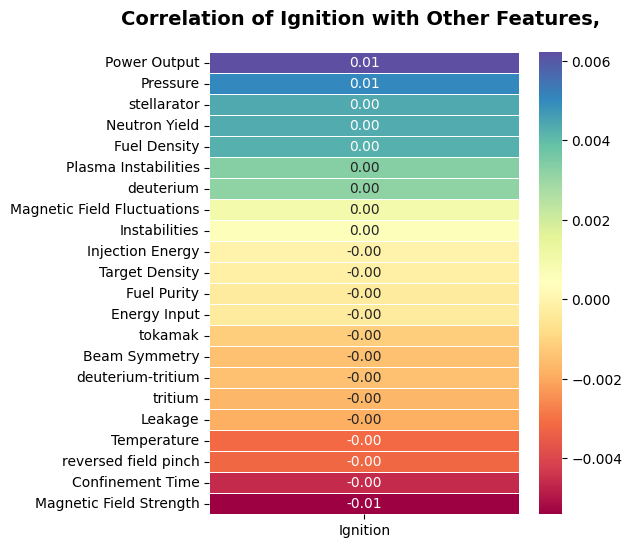

In [60]:
target = 'Ignition'
corr_values = df.corr(numeric_only=True)[target].drop(target)
corr_df = corr_values.to_frame().sort_values(by=target, ascending=False)
plt.figure(figsize=(5, 6))
sns.heatmap(corr_df, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.7, cbar=True)
plt.title(f'Correlation of {target} with Other Features, ', fontsize=14, fontweight='bold', pad=20)
plt.show()

**Heatmap Analysis**: Correlation between features and ignition in fusion.

**Weak Correlations**: Most values near zero, indicating negligible relationships.

**Highest Correlations**: Power output & pressure (+0.01); Magnetic field strength (-0.01).

**Other Variables**: Fuel density, neutron yield, and plasma instabilities show minimal correlation.

**Color Gradient**: Blue for positive, red for negative correlations.

**Conclusion**: No strong influence of listed features on ignition in this dataset.

In [61]:
df.to_csv("/content/drive/My Drive/Herald College/Semester03/Concepts-AI/finalAssesment/fusion_experiment_preprocessed.csv", index=False)

In [62]:
X = df.drop("Ignition", axis = 1)
y = df["Ignition"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression**


In [65]:
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

In [66]:
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [67]:
#  Make predictions
y_pred = logreg_model.predict(X_test)

In [68]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.70


In [69]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83     14046
           1       0.00      0.00      0.00      5954

    accuracy                           0.70     20000
   macro avg       0.35      0.50      0.41     20000
weighted avg       0.49      0.70      0.58     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
#  Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[14046     0]
 [ 5954     0]]


**hyper parameter tuning for logistic regression**

In [71]:
C_values = [0.01, 0.1, 1, 10]
best_accuracy = 0
best_C = None
best_model = None

for C in C_values:
    model = LogisticRegression(C=C, solver='liblinear', random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"C: {C}, Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C
        best_model = model

print(f"\nBest Model -> C: {best_C}, Accuracy: {best_accuracy:.4f}")
print("\nBest Model Classification Report:")
print(classification_report(y_test, best_model.predict(X_test)))

C: 0.01, Accuracy: 0.7023
C: 0.1, Accuracy: 0.7023
C: 1, Accuracy: 0.7023
C: 10, Accuracy: 0.7023

Best Model -> C: 0.01, Accuracy: 0.7023

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83     14046
           1       0.00      0.00      0.00      5954

    accuracy                           0.70     20000
   macro avg       0.35      0.50      0.41     20000
weighted avg       0.49      0.70      0.58     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
# Create the model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100,class_weight="balanced", random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [73]:
y_pred = rf_model.predict(X_test)

In [74]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.70

Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83     14046
           1       0.00      0.00      0.00      5954

    accuracy                           0.70     20000
   macro avg       0.35      0.50      0.41     20000
weighted avg       0.49      0.70      0.58     20000


Confusion Matrix:
[[14043     3]
 [ 5954     0]]


In [75]:
# Define hyperparameter values to test
n_estimators_values = [50, 100, 200]  # Number of trees
max_depth_values = [10, 20, None]  # Tree depth

In [76]:
best_accuracy = 0
best_n_estimators = None
best_max_depth = None
best_model = None

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, Accuracy: {accuracy:.4f}")

        # Check if this is the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_estimators = n_estimators
            best_max_depth = max_depth
            best_model = model

# Print the best hyperparameters
print(f"\nBest Model -> n_estimators: {best_n_estimators}, max_depth: {best_max_depth}, Accuracy: {best_accuracy:.4f}")

# Evaluate best model
print("\nBest Model Classification Report:")
print(classification_report(y_test, best_model.predict(X_test)))

n_estimators: 50, max_depth: 10, Accuracy: 0.7023
n_estimators: 50, max_depth: 20, Accuracy: 0.7022
n_estimators: 50, max_depth: None, Accuracy: 0.6990
n_estimators: 100, max_depth: 10, Accuracy: 0.7023
n_estimators: 100, max_depth: 20, Accuracy: 0.7022
n_estimators: 100, max_depth: None, Accuracy: 0.7014
n_estimators: 200, max_depth: 10, Accuracy: 0.7023
n_estimators: 200, max_depth: 20, Accuracy: 0.7023
n_estimators: 200, max_depth: None, Accuracy: 0.7022

Best Model -> n_estimators: 50, max_depth: 10, Accuracy: 0.7023

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83     14046
           1       0.00      0.00      0.00      5954

    accuracy                           0.70     20000
   macro avg       0.35      0.50      0.41     20000
weighted avg       0.49      0.70      0.58     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Both accuracy are of same so we are going to use logistic regression because it took way little time to process**

In [77]:
model = LogisticRegression(C=best_C, solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=42, solver='liblinear')

In [78]:
y_pred_best = model.predict(X_test)

In [79]:
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy with Best Hyperparameter (C={best_C}): {accuracy_best:.4f}')

Accuracy with Best Hyperparameter (C=0.01): 0.7023


In [80]:
# Classification Report
print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best))


Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83     14046
           1       0.00      0.00      0.00      5954

    accuracy                           0.70     20000
   macro avg       0.35      0.50      0.41     20000
weighted avg       0.49      0.70      0.58     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
# Confusion Matrix
print("\nBest Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Best Model Confusion Matrix:
[[14046     0]
 [ 5954     0]]
